In [1]:
# Copyright 2024 Keysight Technologies Inc.

In [2]:
import trueq as tq
import trueq.simulation as tqs

# make a noisy simulator
sim = tq.Simulator().add_depolarizing(0.03, match=tqs.GateMatch(tq.Gate.cx))
sim.add_readout_error(0.01)

In [3]:
# create the circuit
circuit = tq.Circuit(
    [
        {0: tq.Gate.h},
        {(0, 1): tq.Gate.cx},
        {(0, 2): tq.Gate.cx, (1, 3): tq.Gate.cx},
        {(0, 4): tq.Gate.cx},
    ]
).measure_all()

# show the circuit
circuit.draw()

DisplayWrapper(<svg xmlns="http://w...)

In [4]:
# generate the NOX circuits
nox_circuits = tq.make_nox(circuit, n_identities=2, n_compilations=30)

# show the circuit which amplifies noise on the first hard cycle
nox_circuits[1].draw()

DisplayWrapper(<svg xmlns="http://w...)

In [5]:
# run the simulation
sim.run(nox_circuits, n_shots=500)

# set which observables and outcomes to estimate
labels = ((0, 1, 2, 3),)
observables = ["0000", "1111", "ZIZI"]

# fit
fit = nox_circuits.fit(labels, observables=observables)
fit

EstimateCollection(1)

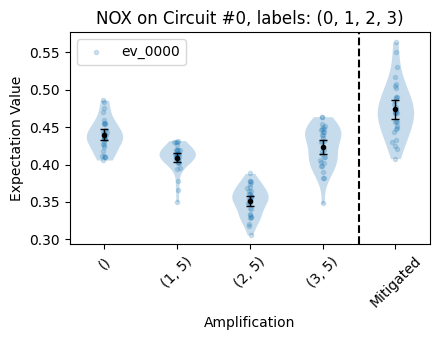

In [6]:
# plot the results for the ZZZZ observable
fit.plot.raw_nox(observables=["0000"])

In [7]:
# unmitigated results
sim.run(circuit, n_shots=15000)
res_unmit = circuit.get_probability(["00000", "11111"])

# nox results
res_nox = nox_circuits.fit(observables=["00000", "11111"]).array("ev_\d*").vals

print("Prob. of output 00000")
print("Correct value: 0.50")
print(f"Unmitigated circuits: {res_unmit[0]:.2f}")
print(f"Mitigated circuits: {res_nox[0]:.2f}")

print("\nProb. of output 11111")
print("Correct value: 0.50")
print(f"Unmitigated circuits: {res_unmit[1]:.2f}")
print(f"Mitigated circuits: {res_nox[1]:.2f}")

Prob. of output 00000
Correct value: 0.50
Unmitigated circuits: 0.43
Mitigated circuits: 0.47

Prob. of output 11111
Correct value: 0.50
Unmitigated circuits: 0.43
Mitigated circuits: 0.48


In [8]:
# create and run RCAL circuits
rcal_circuits = tq.make_rcal([0, 1, 2, 3, 4])
sim.run(rcal_circuits, n_shots=5000)

# add RCAL circuits to circuit collection
nox_circuits.append(rcal_circuits)

# get the results
# the readout calibration correction is automatically applied when we fit
fit = nox_circuits.fit(observables=["00000", "11111", "01100", "ZZIIZ"])
fit

EstimateCollection(2)

In [9]:
# set the register dimension to 3 (i.e. qutrits)
tq.settings.set_dim(3)

# make a noisy simulator
sim = tq.Simulator().add_depolarizing(0.01, match=tqs.GateMatch(tq.Gate.cx3))

# create the circuit
circuit = tq.Circuit(
    [
        {(0): tq.Gate.f3},
        {(0, 1): tq.Gate.cx3},
        {(0, 2): tq.Gate.cx3},
        {(0, 3): tq.Gate.cx3},
    ]
)
circuit.measure_all()

# generate the NOX circuits
circuits = tq.make_nox(circuit)

# run the simulation
sim.run(circuits, n_shots=500)

# set which observables and outcomes to estimate
labels = ((0, 1, 2, 3),)
observables = ["W01W01W01W01", "1111", "0000", "2222", "0120"]

# fit
estimate_collection = circuits.fit(labels, observables=observables)
estimate_collection

EstimateCollection(1)